In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

# Modelación y evaluación

In [2]:
#Leemos nuestros datos de entrenamiento
x = pd.read_csv('dataEntreno.csv')
x.head()

,production_budget,worldwide_gross,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score,gross
0,425000000.0,2.783919e+09,2009.000000,1.780000,178.000000,4834.0,2.370000e+08,7.9,7.605058e+08
1,306000000.0,2.058662e+09,2002.102628,2.126683,108.552703,143.0,3.712339e+07,7.1,4.819001e+07
2,300000000.0,9.634204e+08,2007.000000,2.350000,169.000000,48350.0,3.000000e+08,7.1,3.094042e+08
3,300000000.0,8.796209e+08,2015.000000,2.350000,148.000000,11700.0,2.450000e+08,6.8,2.000742e+08
4,275000000.0,1.084439e+09,2012.000000,2.350000,164.000000,106759.0,2.500000e+08,8.5,4.481306e+08


In [3]:
#Seleccionamos nuestra variable objetivo
y = x['worldwide_gross']
y.describe()

count    4.061000e+03
mean     9.545619e+07
std      1.730473e+08
min      4.500000e+02
25%      7.445044e+06
50%      3.346201e+07
75%      1.045054e+08
max      2.783919e+09
Name: worldwide_gross, dtype: float64

In [4]:
x.drop('worldwide_gross', axis= 1, inplace=True)
x.describe()

,production_budget,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score,gross
count,4.061000e+03,4061.000000,4061.000000,4061.000000,4061.000000,4.061000e+03,4061.000000,4.061000e+03
mean,3.322837e+07,2002.102628,2.126683,108.552703,10307.988919,3.712339e+07,6.456513,4.819001e+07
std,4.088155e+07,12.036966,0.744570,23.091377,18821.488171,6.952630e+07,1.071517,6.398627e+07
min,1.100000e+03,1920.000000,1.180000,7.000000,0.000000,2.180000e+02,1.600000,1.620000e+02
25%,7.000000e+06,1999.000000,1.850000,94.000000,1591.000000,8.500000e+06,5.800000,7.017178e+06
50%,2.000000e+07,2005.000000,2.126683,104.000000,3341.000000,2.500000e+07,6.600000,3.174333e+07
75%,4.300000e+07,2010.000000,2.350000,119.000000,14619.000000,4.200000e+07,7.200000,5.643795e+07
max,4.250000e+08,2016.000000,16.000000,325.000000,656730.000000,2.500000e+09,9.500000,7.605058e+08


## Modelo simple de regresión (lasso)

In [5]:
#Definimos nuestras variables de entrenamiento y de pruebas
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.4)

In [6]:
#Miremos algunos datos
print('El tamño del dataset es de {}'.format(len(x)))
print('El porcentaje del set de entrenamiento es de {}'.format(len(X_train)/len(x)))
print('El porcentaje del set de prueba es de {}'.format(len(X_test)/len(x)))

El tamño del dataset es de 4061
El porcentaje del set de entrenamiento es de 0.5998522531396208
El porcentaje del set de prueba es de 0.40014774686037924


In [7]:
# Instanciamos nuestro estimador
model = Lasso()

In [8]:
#Iniciamos el entreno de nuestro modelo
model.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [9]:
#Predecimos con nuestros datos de prueba
predicted = model.predict(X_test)
predicted

array([8.52985653e+07, 1.07833868e+08, 4.34579939e+07, ...,
       3.27345926e+07, 2.80724846e+08, 4.86095730e+07])

In [10]:
# Graficar en Jupyter
%matplotlib inline

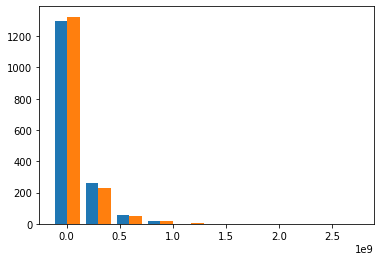

In [11]:
plt.hist([predicted,y_test]);

#### Evaluación del comportamiento de nuestro modelo

In [12]:
#Miramos el score
model.score(X_test,y_test)

0.8668230450272724

Un buen score R2 es importante para una regresión. Pero no lo es todo. De forma general los scores hay que complementarlos con visualizaciones de los datos ya que una métrica no logra siempre encodear todas las caracteristicas de una distribución de probabilidades.

In [13]:
#Miramos los residuos
residuals = y_test - predicted
residuals.head()

874    -3.918593e+07
292     2.789397e+06
3049   -2.047426e+06
3314    3.592221e+07
2067    2.382494e+07
Name: worldwide_gross, dtype: float64

In [14]:
print(residuals.shape,y_test.shape,predicted.shape)

(1625,) (1625,) (1625,)


In [15]:
np.array_equal(residuals,y_test)

False

In [16]:
np.array_equal(y_test,predicted)

False

Si hay patrones aparentes, es malo

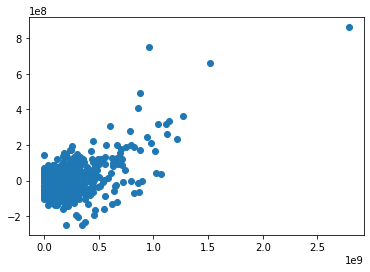

In [17]:
plt.scatter(y_test,residuals)

In [18]:
# Errores en porcentaje ---> "Normalizar"
ap_residuals = np.abs(residuals) / y_test

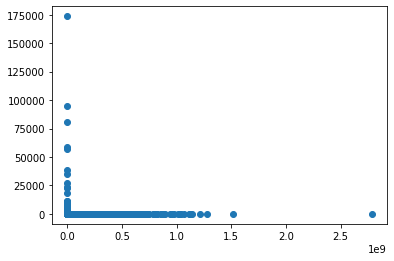

In [19]:
plt.scatter(y_test,ap_residuals)

In [20]:
#Como hay residuos muy alejados usare una escala logaritmica
log_residuals =np.log(ap_residuals)

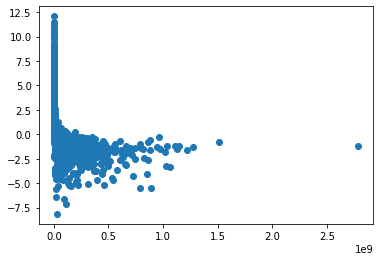

In [21]:
plt.scatter(y_test,log_residuals)

(array([6.15384615e-04, 6.15384615e-04, 6.15384615e-04, 6.15384615e-04,
        1.23076923e-03, 1.23076923e-03, 1.23076923e-03, 1.84615385e-03,
        2.46153846e-03, 2.46153846e-03, 2.46153846e-03, 2.46153846e-03,
        3.07692308e-03, 4.30769231e-03, 7.38461538e-03, 8.61538462e-03,
        9.23076923e-03, 1.29230769e-02, 1.47692308e-02, 1.66153846e-02,
        2.40000000e-02, 2.83076923e-02, 3.38461538e-02, 4.06153846e-02,
        4.92307692e-02, 5.84615385e-02, 6.95384615e-02, 8.67692308e-02,
        1.07076923e-01, 1.27384615e-01, 1.55076923e-01, 1.96923077e-01,
        2.44923077e-01, 2.92307692e-01, 3.43384615e-01, 3.95076923e-01,
        4.42461538e-01, 4.92307692e-01, 5.41538462e-01, 5.87692308e-01,
        6.27692308e-01, 6.57846154e-01, 6.92923077e-01, 7.13846154e-01,
        7.34769231e-01, 7.55076923e-01, 7.70461538e-01, 7.85230769e-01,
        7.97538462e-01, 8.11076923e-01, 8.20923077e-01, 8.30769231e-01,
        8.40615385e-01, 8.47384615e-01, 8.54769231e-01, 8.670769

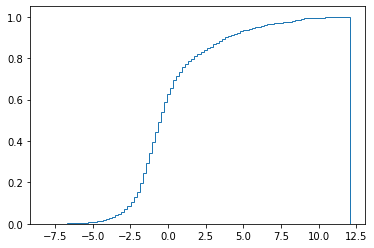

In [22]:
# Hacemos una evaluacion de errores Diagrama de escala acumulativa de distribucion de errores
# haremos un histograma, normalizado
plt.hist(log_residuals,bins=100,density=1,histtype='step', cumulative=True)
# Un error menor al 100% del ingreso lo tengo para el 70% de los datos
# un erro del 10% para 40% de los datos

array([0.13533528, 0.22313016, 0.36787944, 0.60653066, 1.        ])

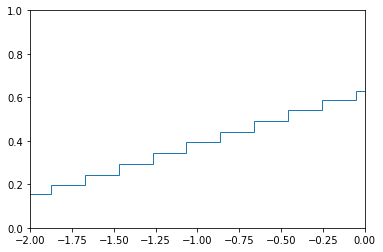

In [23]:
plt.hist(log_residuals, bins=100, density=1, histtype='step',cumulative=True);
plt.axis([-2,0,0,1])
np.power(np.exp(1)*np.ones(5),np.linspace(-2,0,5))
#Un erro de 1% lo tengo para un 20% de los datos
#Errores inferiores al 10% tengo un 40% de los datos

In [24]:
# Calcula la matriz de correlacion
x.corr()

,production_budget,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score,gross
production_budget,1.000000,0.205812,0.076272,0.272109,0.233954,0.519611,0.033352,0.639750
title_year,0.205812,1.000000,0.130135,-0.140261,0.124159,0.125360,-0.177560,0.012704
aspect_ratio,0.076272,0.130135,1.000000,-0.013447,0.020563,0.046687,0.037795,0.029466
duration,0.272109,-0.140261,-0.013447,1.000000,0.120608,0.182824,0.317001,0.235836
cast_total_facebook_likes,0.233954,0.124159,0.020563,0.120608,1.000000,0.113938,0.097513,0.207323
budget,0.519611,0.125360,0.046687,0.182824,0.113938,1.000000,0.034820,0.326548
imdb_score,0.033352,-0.177560,0.037795,0.317001,0.097513,0.034820,1.000000,0.201647
gross,0.639750,0.012704,0.029466,0.235836,0.207323,0.326548,0.201647,1.000000


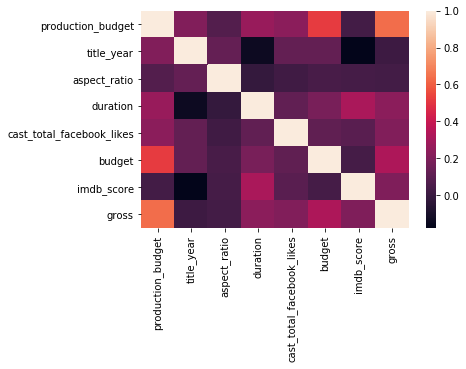

In [25]:
sb.heatmap(x.corr())